In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# sklearn.datasets 
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    # 100 samples
    data = np.array(df.iloc[:100, [0,1,-1]])
    # 2 features
    return data[:,:2], data[:,-1]

In [3]:
# split the dataset into the Train set and Test set
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

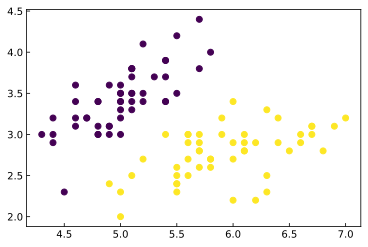

In [4]:
# 
plt.figure(figsize=(6,4))
plt.tick_params(direction='in')
plt.scatter(X[:,0],X[:,1],c=y)
plt.savefig('./fig/fig1',dpi=300)

In [5]:
class LogisticReressionClassifier:
    # define iteration & learning rate
    def __init__(self,max_iter = 200,learning_rate = 0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    # Sigmoid function
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    
    def data_matrix(self,X):
        data_mat = []
        for d in X:
            # add bias
            data_mat.append([1.0,*d])
        return data_mat
    
    # train parameter on the train set
    def fit(self,X,y):
        data_mat = self.data_matrix(X)
        # initialization weights
        self.weights = np.zeros((len(data_mat[0]),1),dtype = np.float32)
        
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                res = self.sigmoid(np.dot(data_mat[i],self.weights))
                # loss
                error = y[i] - res
                # update weights
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LogisticRegression Model(learning_rate={},iter={})'.format(\
                    self.learning_rate,self.max_iter))
    # evaluate on the test set        
    def score(self,X_test,y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x,y in zip(X_test,y_test):
            res = np.dot(x,self.weights)
            if (res > 0 and y == 1) or (res < 0 and y == 0):
                right += 1
            
        return right/len(X_test)

In [6]:
clf = LogisticReressionClassifier()
clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,iter=200)


In [7]:
clf.score(X_test, y_test)

1.0

In [8]:
clf.weights

array([[-0.91598684],
       [ 3.4445786 ],
       [-5.731682  ]], dtype=float32)


$$
\begin{equation}
\begin{aligned}
decision\space boundary:\\
h_\theta & =sigmoid(\theta^{T}x) \\
& = sigmoid(\theta_0+\theta_1x_1+\theta_2x_2)\\
& = sigmoid(z)\\
& = \frac{1}{1+e^{-\theta^{T}x}}\\
& = \frac{1}{1+e^{-z}}\\
\\
z & =\theta^{T}x\\
\\
h_\theta & = \frac{1}{2} = \frac{1}{1+e^{-z}}\\
1+e^{-z} & = 2\\
e^{-z}   & = 1\\
z & = 0 \\
\\
z & = \theta^{T}x\\
z & = \theta_0+\theta_1x_1+\theta_2x_2\\
\theta_0+\theta_1x_1+\theta_2x_2 & = 0\\
x_2 &= \frac{\theta_0+\theta_1x_1}{\theta_2}
\end{aligned}
\end{equation}
$$





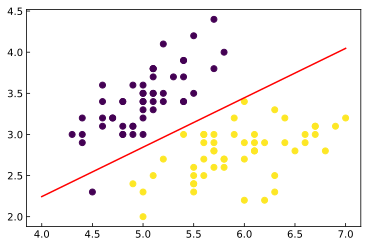

In [9]:
# decision boundary

x_ponits = np.arange(4, 8)
y_ = -(clf.weights[1]*x_ponits + clf.weights[0])/clf.weights[2]

plt.figure(figsize=(6,4))
plt.plot(x_ponits, y_,c='r')

plt.tick_params(direction='in')
plt.scatter(X[:,0],X[:,1],c=y)
plt.savefig('./fig/fig2',dpi=300)